# ALL IMPORTS NECESSARY ARE HERE AT THE TOP

In [ ]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from google.colab import drive
from scipy.interpolate import interp1d
import random
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.convolutional import Conv1D
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

drive.mount('/content/drive')

Mounted at /content/drive


https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=pt-br

# READING THE DATA AND CREATING THE VARIABLES FOR THE DATASETS

In [ ]:
file_paths = [
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario1.mat',
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario2.mat',
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario3.mat',
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario4.mat',
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario5.mat',
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario6.mat',
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario7.mat',
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario8.mat',
    '/content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario9.mat'
]

file_data = []
df = []

for i, file_path in enumerate(file_paths):
    print(f"Reading File: {file_path}")
    data = sio.loadmat(file_path)
    df.append(pd.DataFrame(data['data'], columns=['ALE', 'NLE', 'ALD', 'NLD','S4_y1', 'S4_z1', 'S1_y1', 'S1_z1', 'S2_y1', 'S2_z1', 'S3_y1', 'S3_z1', 'Label']))

Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario1.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario2.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario3.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario4.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario5.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario6.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario7.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario8.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Final_Data/final_data_damaged_scenario9.mat


In [ ]:
dataset1 = df[0]
dataset2 = df[1]
dataset3 = df[2]
dataset4 = df[3]
dataset5 = df[4]
dataset6 = df[5]
dataset7 = df[6]
dataset8 = df[7]
dataset9 = df[8]
dataset1 = dataset1[:1000000]
dataset2 = dataset2[:1000000]
dataset3 = dataset3[:1000000]
dataset4 = dataset4[:1000000]
dataset5 = dataset5[:1000000]
dataset6 = dataset6[:1000000]
dataset7 = dataset7[:1000000]
dataset8 = dataset8[:1000000]
dataset9 = dataset9[:1000000]

# SELECT THE SAMPLE SIZE HERE
sample_size = int(len(dataset1) * 0.01)

dataset1_sample = dataset1.sample(n=sample_size, random_state=42)
dataset2_sample = dataset2.sample(n=sample_size, random_state=42)
dataset3_sample = dataset3.sample(n=sample_size, random_state=42)
dataset4_sample = dataset4.sample(n=sample_size, random_state=42)
dataset5_sample = dataset5.sample(n=sample_size, random_state=42)
dataset6_sample = dataset6.sample(n=sample_size, random_state=42)
dataset7_sample = dataset7.sample(n=sample_size, random_state=42)
dataset8_sample = dataset8.sample(n=sample_size, random_state=42)
dataset9_sample = dataset9.sample(n=sample_size, random_state=42)

# Combine the sampled datasets into a single DataFrame
datasets_sample = [dataset1_sample,
                   dataset2_sample,
                   dataset3_sample,
                   dataset4_sample,
                   dataset5_sample,
                   dataset6_sample,
                   dataset7_sample,
                   dataset8_sample,
                   dataset9_sample]

print("Datasets read successfully")

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

  from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Datasets read successfully
/bin/bash: nvidia-smi: command not found
Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


#outra correlaçao

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset1' is your pandas DataFrame with 12 features and a label column
# Compute the correlation matrix
train_datasets_acc = [dataset1, dataset4, dataset2, dataset5, dataset3, dataset6, dataset7, dataset8, dataset9]
train_data_acc = pd.concat(train_datasets_acc)
train_data_acc = train_data_acc['S4_y1', 'S4_z1', 'S1_y1', 'S1_z1', 'S2_y1', 'S2_z1', 'S3_y1', 'S3_z1', 'Label']
corr_matrix = train_data_acc.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# SEPARATE TRAIN AND TEST DATA AND SCALE

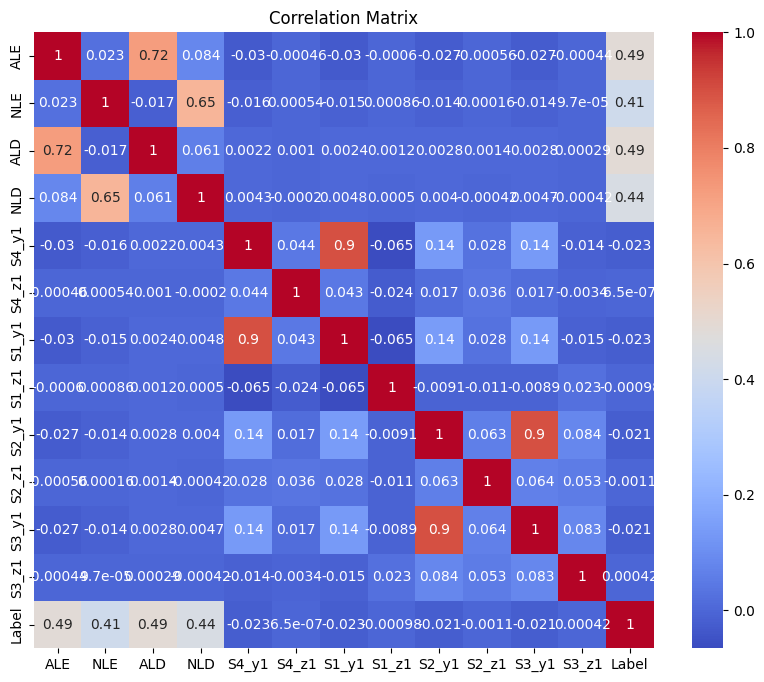

Feature correlations with the label (absolute values):
ALD      4.912045e-01
ALE      4.856835e-01
NLD      4.430711e-01
NLE      4.121428e-01
S4_y1    2.334175e-02
S1_y1    2.320016e-02
S2_y1    2.126183e-02
S3_y1    2.101977e-02
S2_z1    1.146062e-03
S1_z1    9.808967e-04
S3_z1    4.170283e-04
S4_z1    6.524656e-07
Name: Label, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset1' is your pandas DataFrame with 12 features and a label column

# Compute the correlation matrix
train_datasets_acc = [dataset1, dataset4, dataset2, dataset5, dataset3, dataset6, dataset7, dataset8, dataset9]
train_data_acc = pd.concat(train_datasets_acc)
corr_matrix = train_data_acc.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Extract the correlation values with the label column
label_correlations = corr_matrix['Label'].drop('Label')
# Sort the correlations in descending order by absolute values
sorted_correlations = label_correlations.abs().sort_values(ascending=False)

print("Feature correlations with the label (absolute values):")
print(sorted_correlations)

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif
# Separate the features and the label
X = train_data_acc.drop('Label', axis=1)
y = train_data_acc['Label']

# Define the number of features to select
k = 8

# Perform feature selection
if X.dtypes.unique() == 'object':
    # Categorical features
    selector = SelectKBest(chi2, k=k)
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()]
else:
    # Numerical features
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()]

# Get the scores and p-values for all features
scores = selector.scores_
p_values = selector.pvalues_

# Print the selected features
print("Selected Features:")
print(selected_features)

# Print the scores and p-values for all features
print("Feature Scores:")
print(scores)
print("Feature p-values:")
print(p_values)

Selected Features:
Index(['ALE', 'NLE', 'ALD', 'NLD', 'S4_y1', 'S1_y1', 'S2_y1', 'S3_y1'], dtype='object')
Feature Scores:
[2.77838472e+06 1.84156606e+06 2.86211234e+06 2.19837442e+06
 4.90620727e+03 3.83140129e-06 4.84683569e+03 8.65943141e+00
 4.07042787e+03 1.18211397e+01 3.97823404e+03 1.56521331e+00]
Feature p-values:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.98438116e-01 0.00000000e+00 3.25373640e-03
 0.00000000e+00 5.85622663e-04 0.00000000e+00 2.10903553e-01]
